In [413]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [414]:
#dataframe = pd.read_csv(r"TipoPalabra_conteos_mean_umbral_mean.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.7.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_sim0.8.csv")
#dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAs.csv")
dataframe = pd.read_csv(r"TipoPalabra_conteos_umbral_mean_relsemanf_root_difTH_porcentajeR_MAspromedioMAXjacca.csv")
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos,CLASS
0,0.738736,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,0,1,0,0.0,0.165178,entailment
1,0.902263,0.000000,0.0,0,0.0,0.869893,0,0,0.0,0,...,0,0,0,4,0,1,0,1.0,0.798416,entailment
2,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,1,0,0,0,0.0,0.360803,contradiction
3,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,1.0,0.522530,contradiction
4,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,0.0,0.347747,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,1,0,0,0,1.0,1.000000,entailment
96,1.000000,0.768382,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,0.0,0.895790,entailment
97,0.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,0,0,0,0,0.0,0.198153,contradiction
98,1.000000,0.000000,0.0,0,0.0,0.000000,0,0,0.0,0,...,0,0,0,2,0,0,0,1.0,0.322019,contradiction


In [415]:
#dataframe.corr()

In [416]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_NOUN_,ADV_ADJ_,ADV_VERB_,ADV_ADV_,sinonimos,antonimos,hiperonimos,hiponimos,action_wn,sim verbos
count,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.0,100.0,100.000000,100.0,...,100.0,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.800486,0.016507,0.042366,0.0,0.026860,0.157137,0.0,0.0,0.007008,0.0,...,0.0,0.0,0.0,0.030000,1.970000,0.060000,0.030000,0.030000,0.405000,0.458267
std,0.357887,0.116415,0.187950,0.0,0.154081,0.362365,0.0,0.0,0.070079,0.0,...,0.0,0.0,0.0,0.222702,1.374038,0.238683,0.171447,0.171447,0.490799,0.296277
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165178
25%,0.857559,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.255988
50%,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.330108
75%,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.531379
max,1.000000,0.882343,1.000000,0.0,1.000000,1.000000,0.0,0.0,0.700791,0.0,...,0.0,0.0,0.0,2.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [417]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


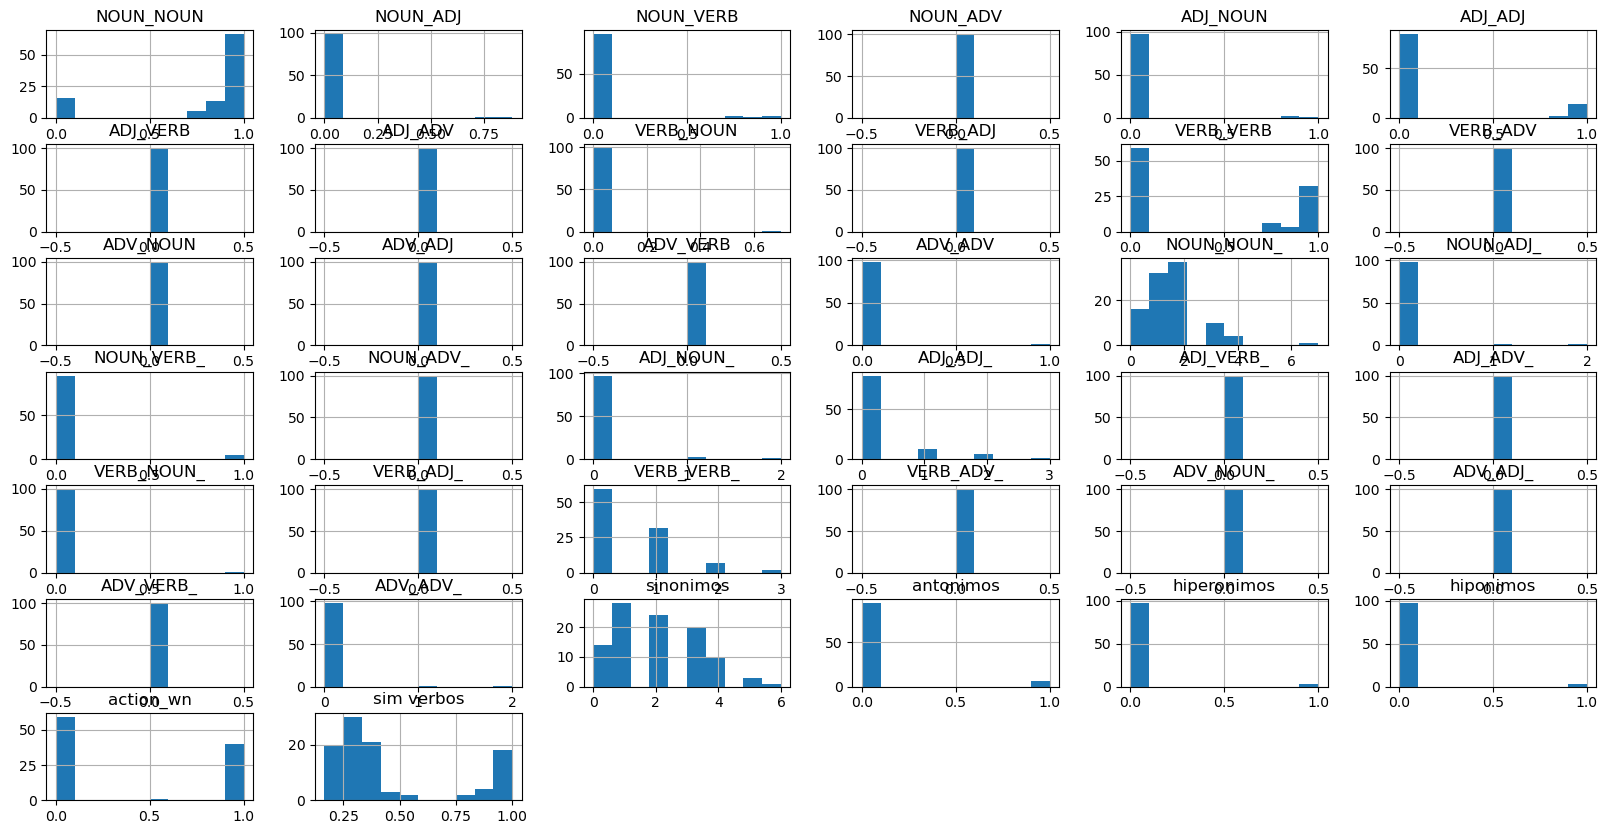

In [418]:
dataframe.hist(figsize=(20,10))
plt.show()

In [419]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [420]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [421]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

C:\Users\Ninja\AppData\Local\Temp\ipykernel_27624\1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
C:\Users\Ninja\AppData\Local\Temp\ipykernel_27624\1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 38)

In [422]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [423]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [424]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

LogisticRegression(C=0.1)

In [425]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [426]:
model.decision_function(X)

array([[ 3.43410205e-01, -1.85387909e-01, -1.58022297e-01],
       [-1.17638627e+00,  8.82376446e-01,  2.94009819e-01],
       [ 2.71727421e-02, -1.35439828e-01,  1.08267086e-01],
       [ 1.96847475e-01,  4.70666261e-01, -6.67513736e-01],
       [-4.00114167e-01,  2.61786536e-01,  1.38327630e-01],
       [-6.30356873e-02,  4.96540103e-01, -4.33504416e-01],
       [-8.89569986e-01,  1.17765488e+00, -2.88084893e-01],
       [-9.64843581e-01,  8.37605857e-01,  1.27237724e-01],
       [ 1.84419469e-02, -1.23396381e-01,  1.04954434e-01],
       [-1.31183116e+00,  1.52453466e+00, -2.12703504e-01],
       [-8.17670085e-01,  7.51175498e-01,  6.64945873e-02],
       [ 4.24480726e-01, -3.55161581e-01, -6.93191459e-02],
       [ 7.80061639e-02,  3.62932515e-01, -4.40938679e-01],
       [ 2.73415712e-02, -1.35671903e-01,  1.08330332e-01],
       [-6.34797410e-01,  3.11071106e-01,  3.23726304e-01],
       [-3.98132181e-01,  2.59062066e-01,  1.39070115e-01],
       [-3.28807374e-01,  5.54323344e-01

In [427]:
labels=dataframe.columns[1:]

In [428]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [429]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [430]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  10 VERB_ADV 32 antonimos
Entailment  32 antonimos 21 ADJ_VERB_
Neutral  21 ADJ_VERB_ 26 VERB_ADV_


In [431]:
n_columns=dataframe.shape[1]-1

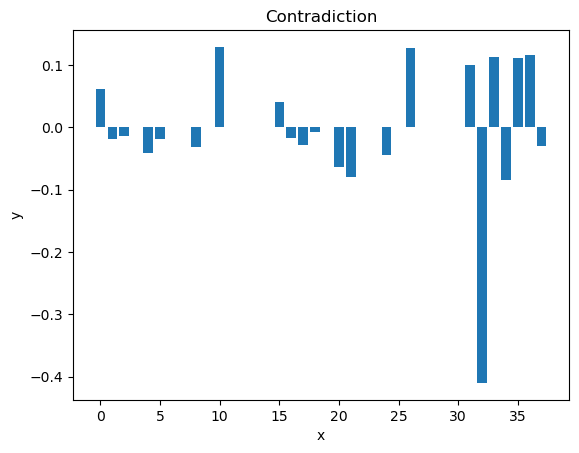

In [432]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

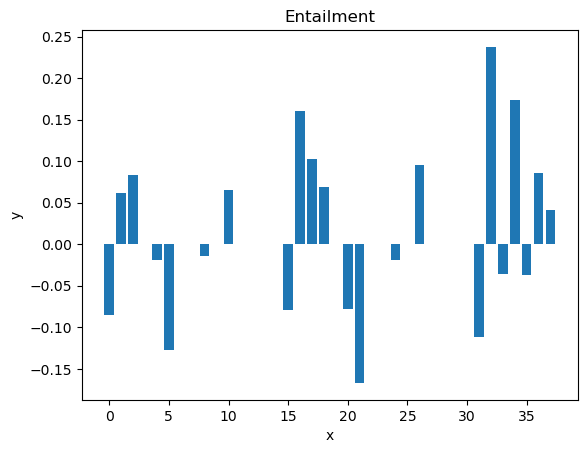

In [433]:
x_v = np.arange(0,n_columns,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

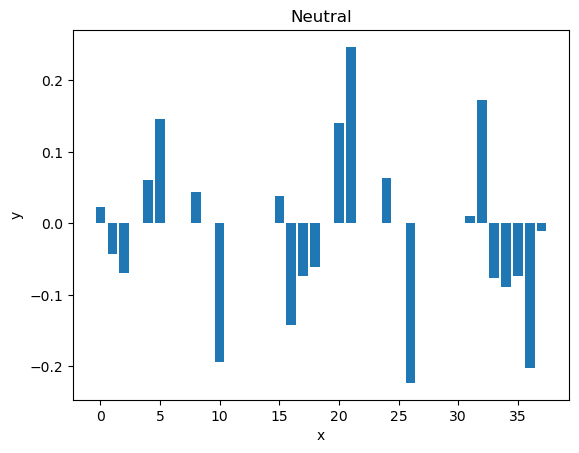

In [434]:
x_v = np.arange(0,n_columns,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [435]:
predictions = model.predict(X)
print(predictions)

['contradiction' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'neutral' 'entailment'
 'entailment' 'contradiction' 'entailment' 'neutral' 'neutral'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment' 'neutral'
 'neutral' 'entailment' 'contradiction' 'neutral' 'neutral'
 'contradiction' 'entailment' 'contradiction' 'neutral' 'entailment'
 'entailment' 'contradiction' 'neutral' 'entailment' 'neutral' 'neutral'
 'entailment' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'entailment' 'entailment'
 'contradiction' 'neutral' 'entailment' 'entailment' 'neutral' 'neutral'
 'neutral' 'entailment' 'entailment' 'neutral' 'entailment' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'contradiction'
 'contradiction' 'entailment' 'contradiction' 'entailment' 'contradiction'
 'neutral' 'entailment' 'entailment' 'entailment' 'entail

In [436]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [437]:
X

array([[0.73873556, 0.        , 0.        , ..., 0.        , 0.        ,
        0.16517779],
       [0.90226305, 0.        , 0.        , ..., 0.        , 1.        ,
        0.79841626],
       [0.99999994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.36080334],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.19815345],
       [1.00000012, 0.        , 0.        , ..., 0.        , 1.        ,
        0.32201928],
       [0.99999982, 0.        , 0.        , ..., 0.        , 0.        ,
        0.25216368]])

In [438]:
model.score(X,y)

0.54

In [439]:
print(confusion_matrix(y, predictions))

[[ 9 11  7]
 [ 5 32  5]
 [ 4 14 13]]


In [440]:
print(f1_score(y,predictions, average=None))

[0.4        0.64646465 0.46428571]


In [441]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [442]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.487500 (0.230149)


In [443]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.55


In [444]:
print(confusion_matrix(Y_validation, predictions))

[[1 2 1]
 [1 5 1]
 [0 4 5]]


In [445]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.50      0.25      0.33         4
   entailment       0.45      0.71      0.56         7
      neutral       0.71      0.56      0.63         9

     accuracy                           0.55        20
    macro avg       0.56      0.51      0.50        20
 weighted avg       0.58      0.55      0.54        20



In [446]:
#X_new = pd.DataFrame()
#model.predict(X_new)